# Feature–Target Correlation Analysis

本 Notebook 计算指定特征与以下三个指标之间的相关性：

- `forward_returns`
- `risk_free_rate`
- `market_forward_excess_returns`

相关性类型包括：

- Pearson 相关系数
- Spearman 等级相关系数
- Kendall Tau 相关系数

In [ ]:
import pandas as pd
from scipy.stats import spearmanr, kendalltau

df = pd.read_csv("../data/train.csv")

print("Data shape:", df.shape)
print("Columns:", df.columns.tolist())

Data shape: (9021, 98)
Columns: ['date_id', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'E1', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E2', 'E20', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'M1', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'P1', 'P10', 'P11', 'P12', 'P13', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'S1', 'S10', 'S11', 'S12', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'V1', 'V10', 'V11', 'V12', 'V13', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'forward_returns', 'risk_free_rate', 'market_forward_excess_returns']


In [2]:
# 指定要分析的特征
features = [
    "E20", "E7",
    "M1", "M13", "M14", "M2", "M3", "M5", "M6",
    "P5", "P6", "P7",
    "S12", "S3", "S5", "S8",
    "V10", "V13", "V5", "V7", "V9",
]

targets = ["forward_returns", "risk_free_rate", "market_forward_excess_returns"]

# 只保留在数据中真实存在的列
features_exist = [c for c in features if c in df.columns]
targets_exist = [c for c in targets if c in df.columns]

print("可用特征:", features_exist)
print("缺失特征:", [c for c in features if c not in df.columns])
print("可用目标:", targets_exist)
print("缺失目标:", [c for c in targets if c not in df.columns])

可用特征: ['E20', 'E7', 'M1', 'M13', 'M14', 'M2', 'M3', 'M5', 'M6', 'P5', 'P6', 'P7', 'S12', 'S3', 'S5', 'S8', 'V10', 'V13', 'V5', 'V7', 'V9']
缺失特征: []
可用目标: ['forward_returns', 'risk_free_rate', 'market_forward_excess_returns']
缺失目标: []


散点图将分析以下特征： ['E20', 'E7', 'M1', 'M13', 'M14', 'M2', 'M3', 'M5', 'M6', 'P5', 'P6', 'P7', 'S12', 'S3', 'S5', 'S8', 'V10', 'V13', 'V5', 'V7', 'V9']


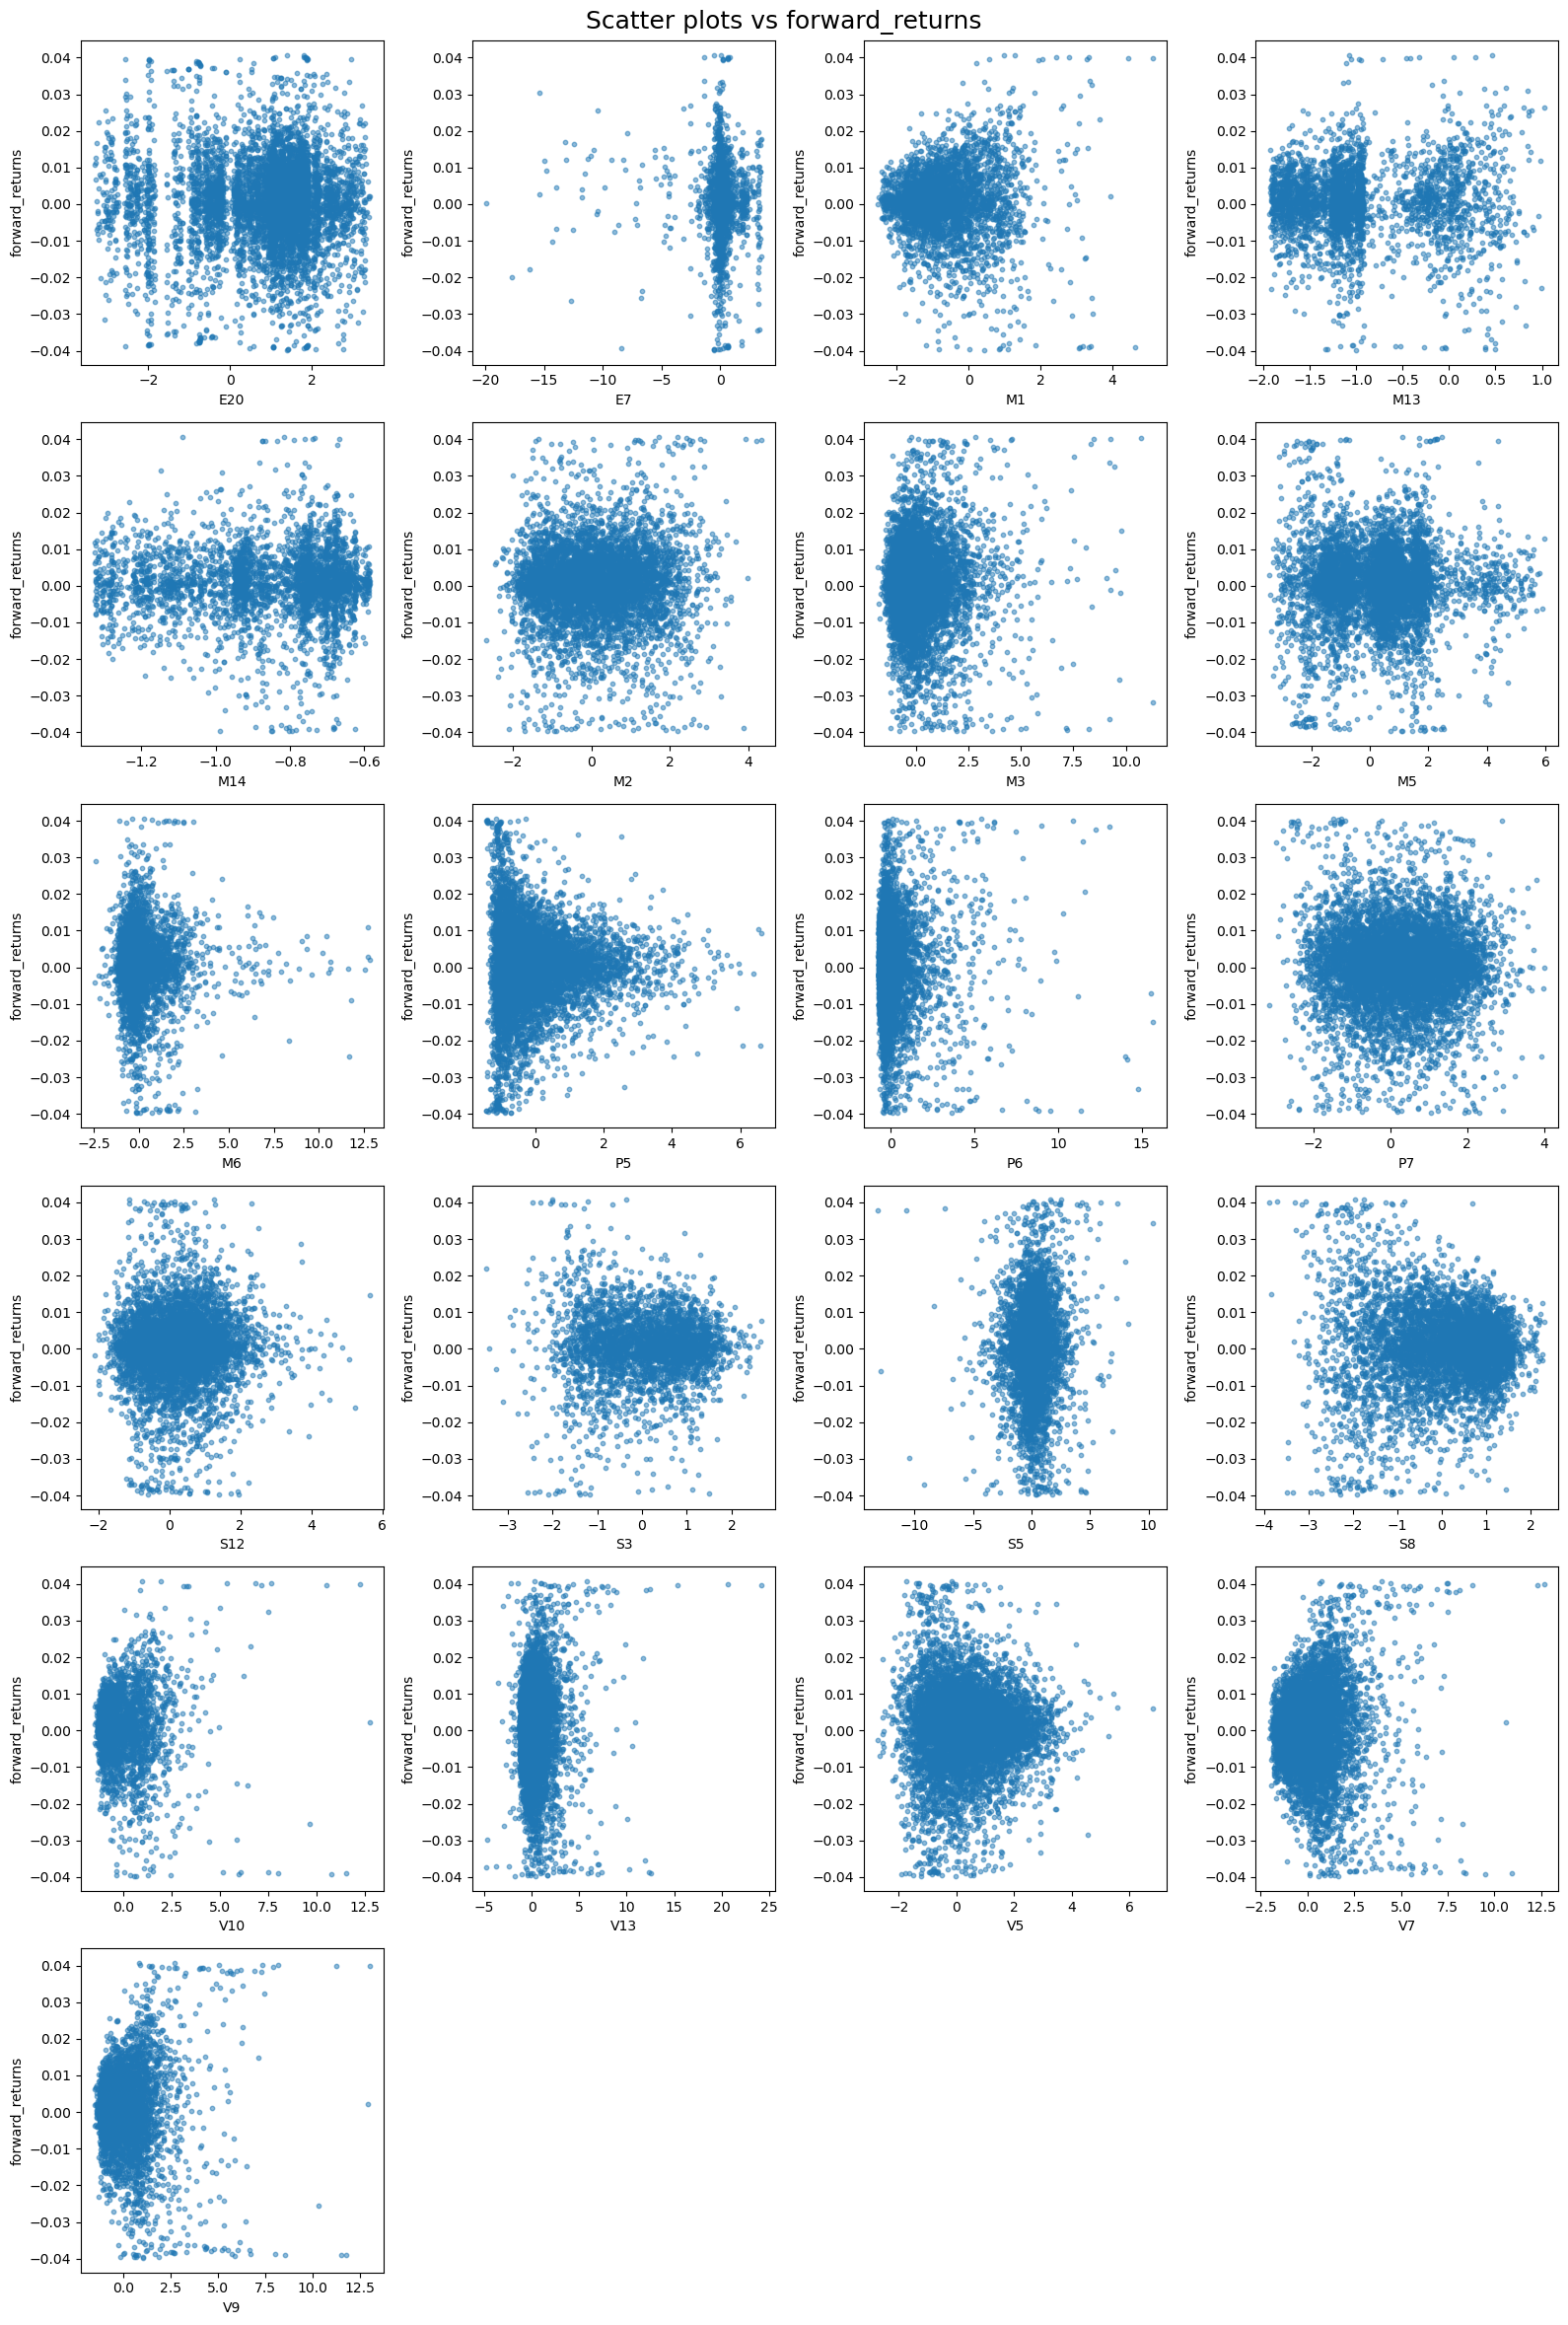

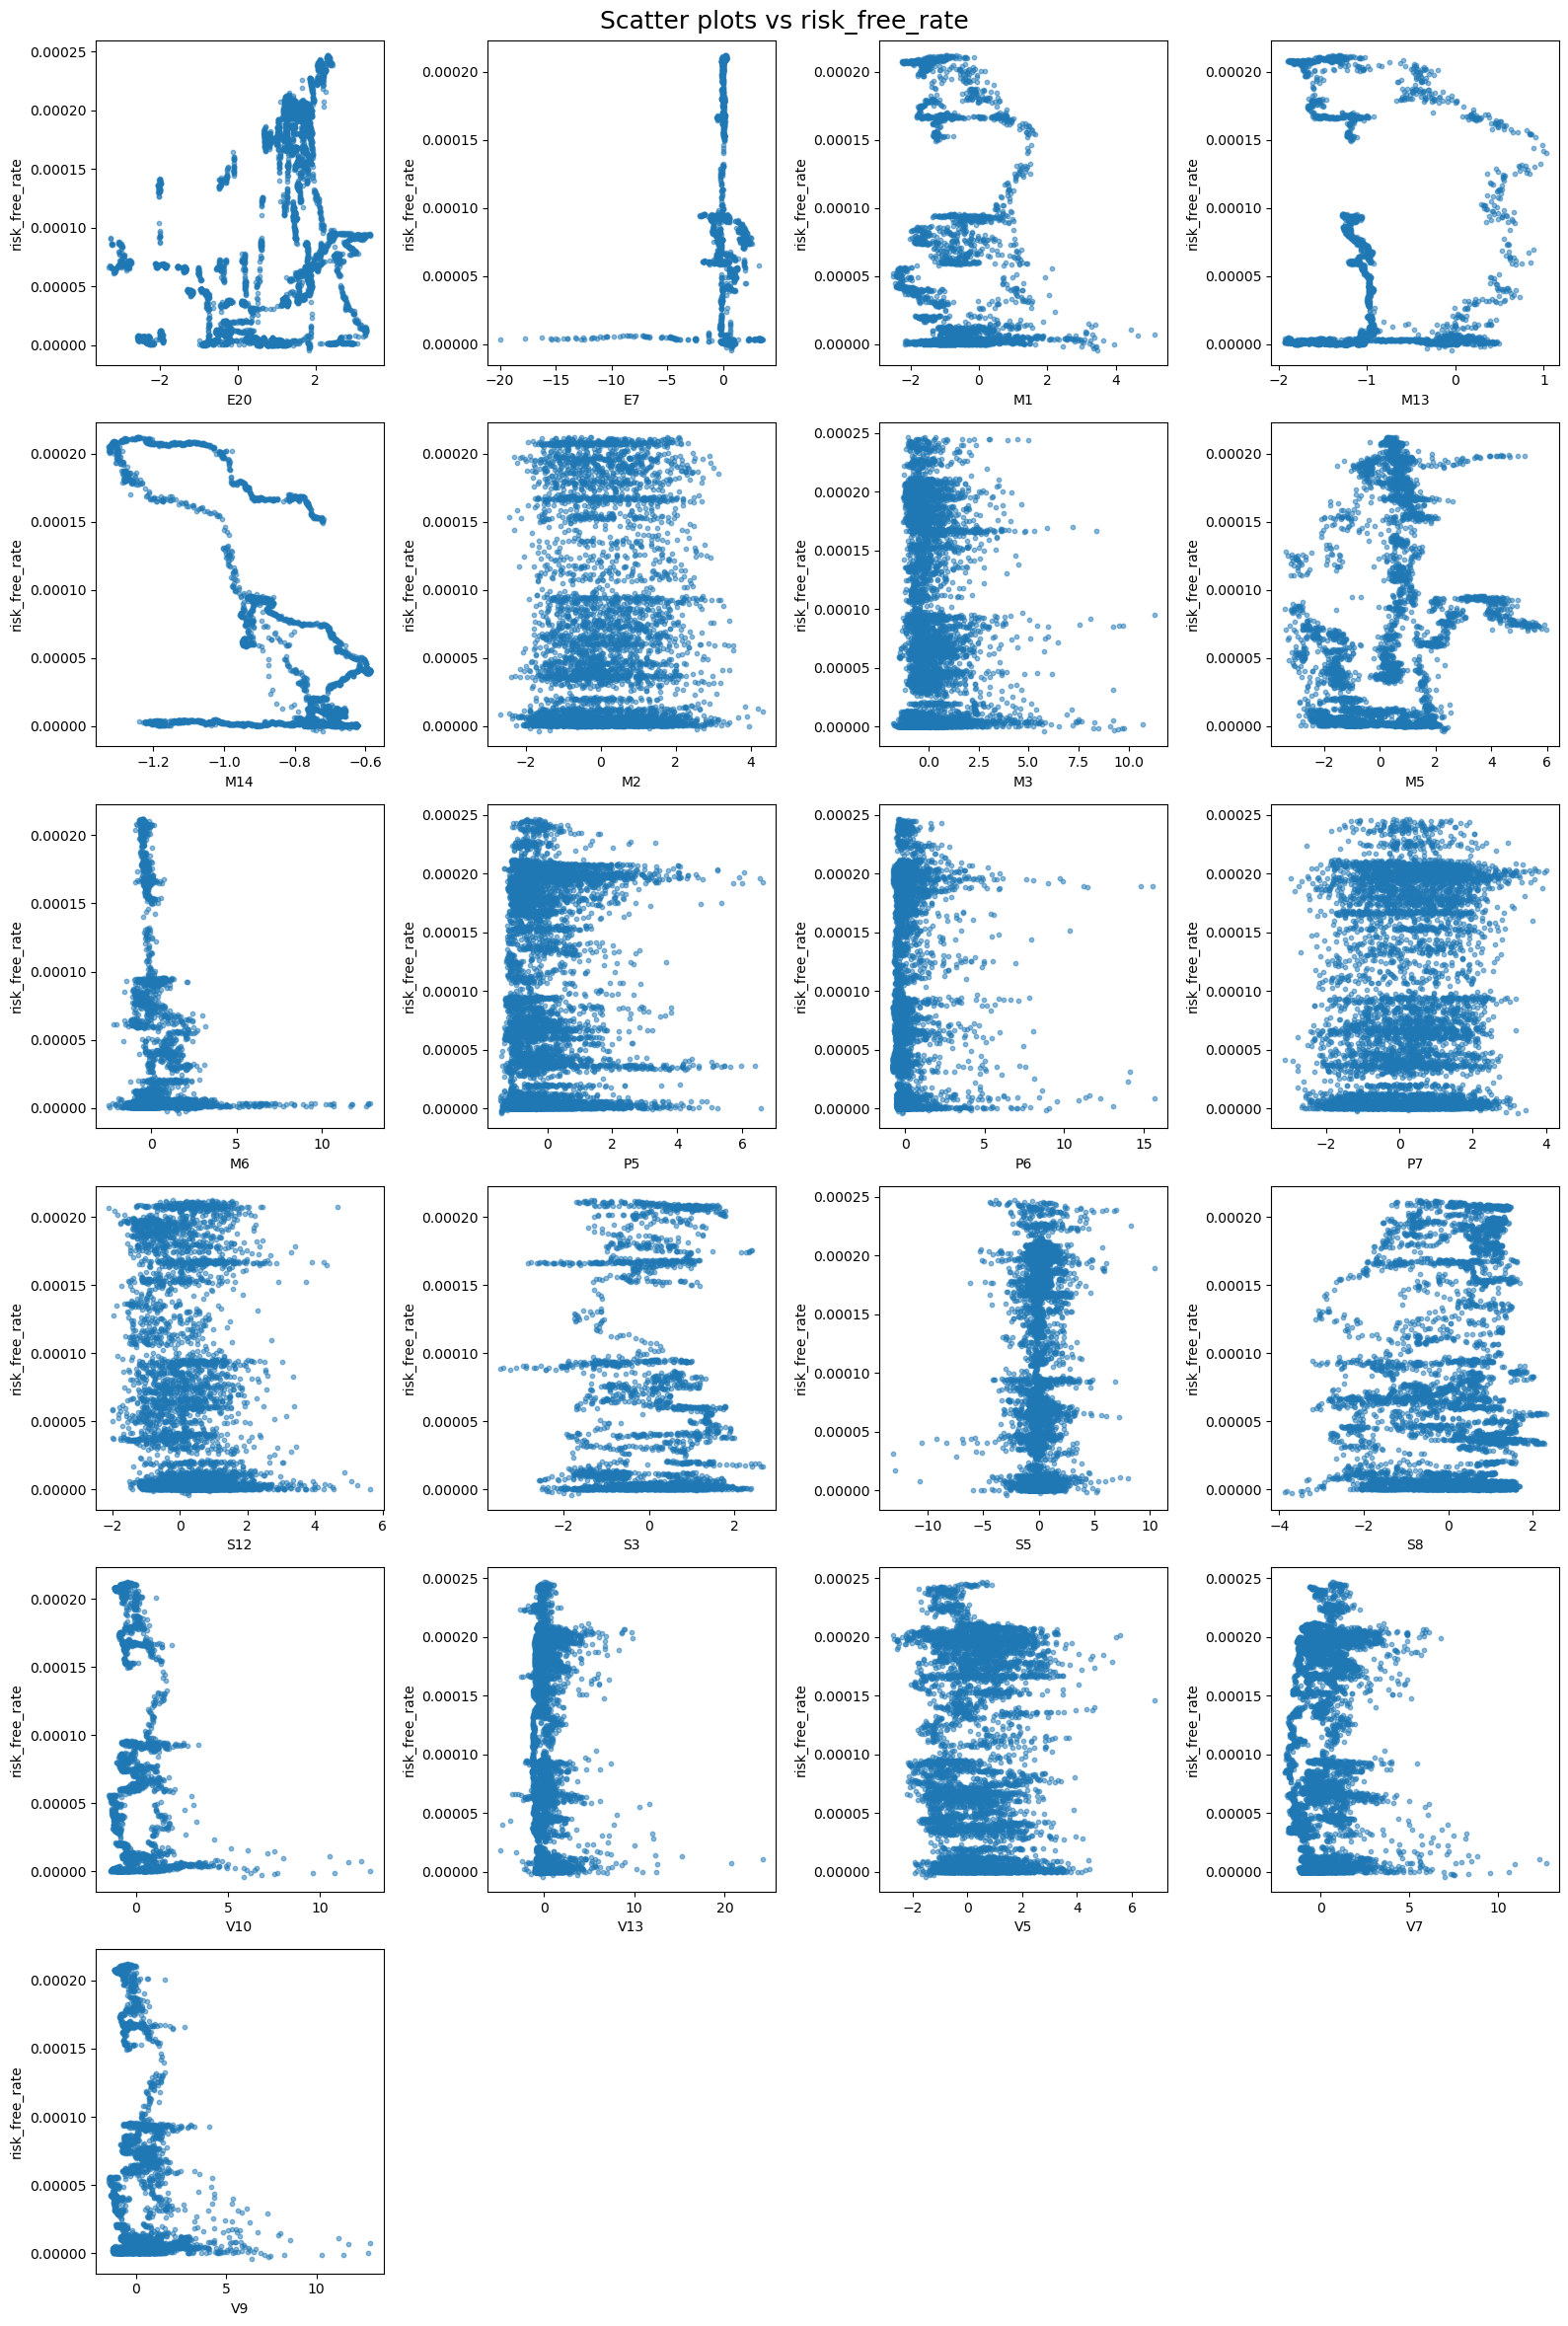

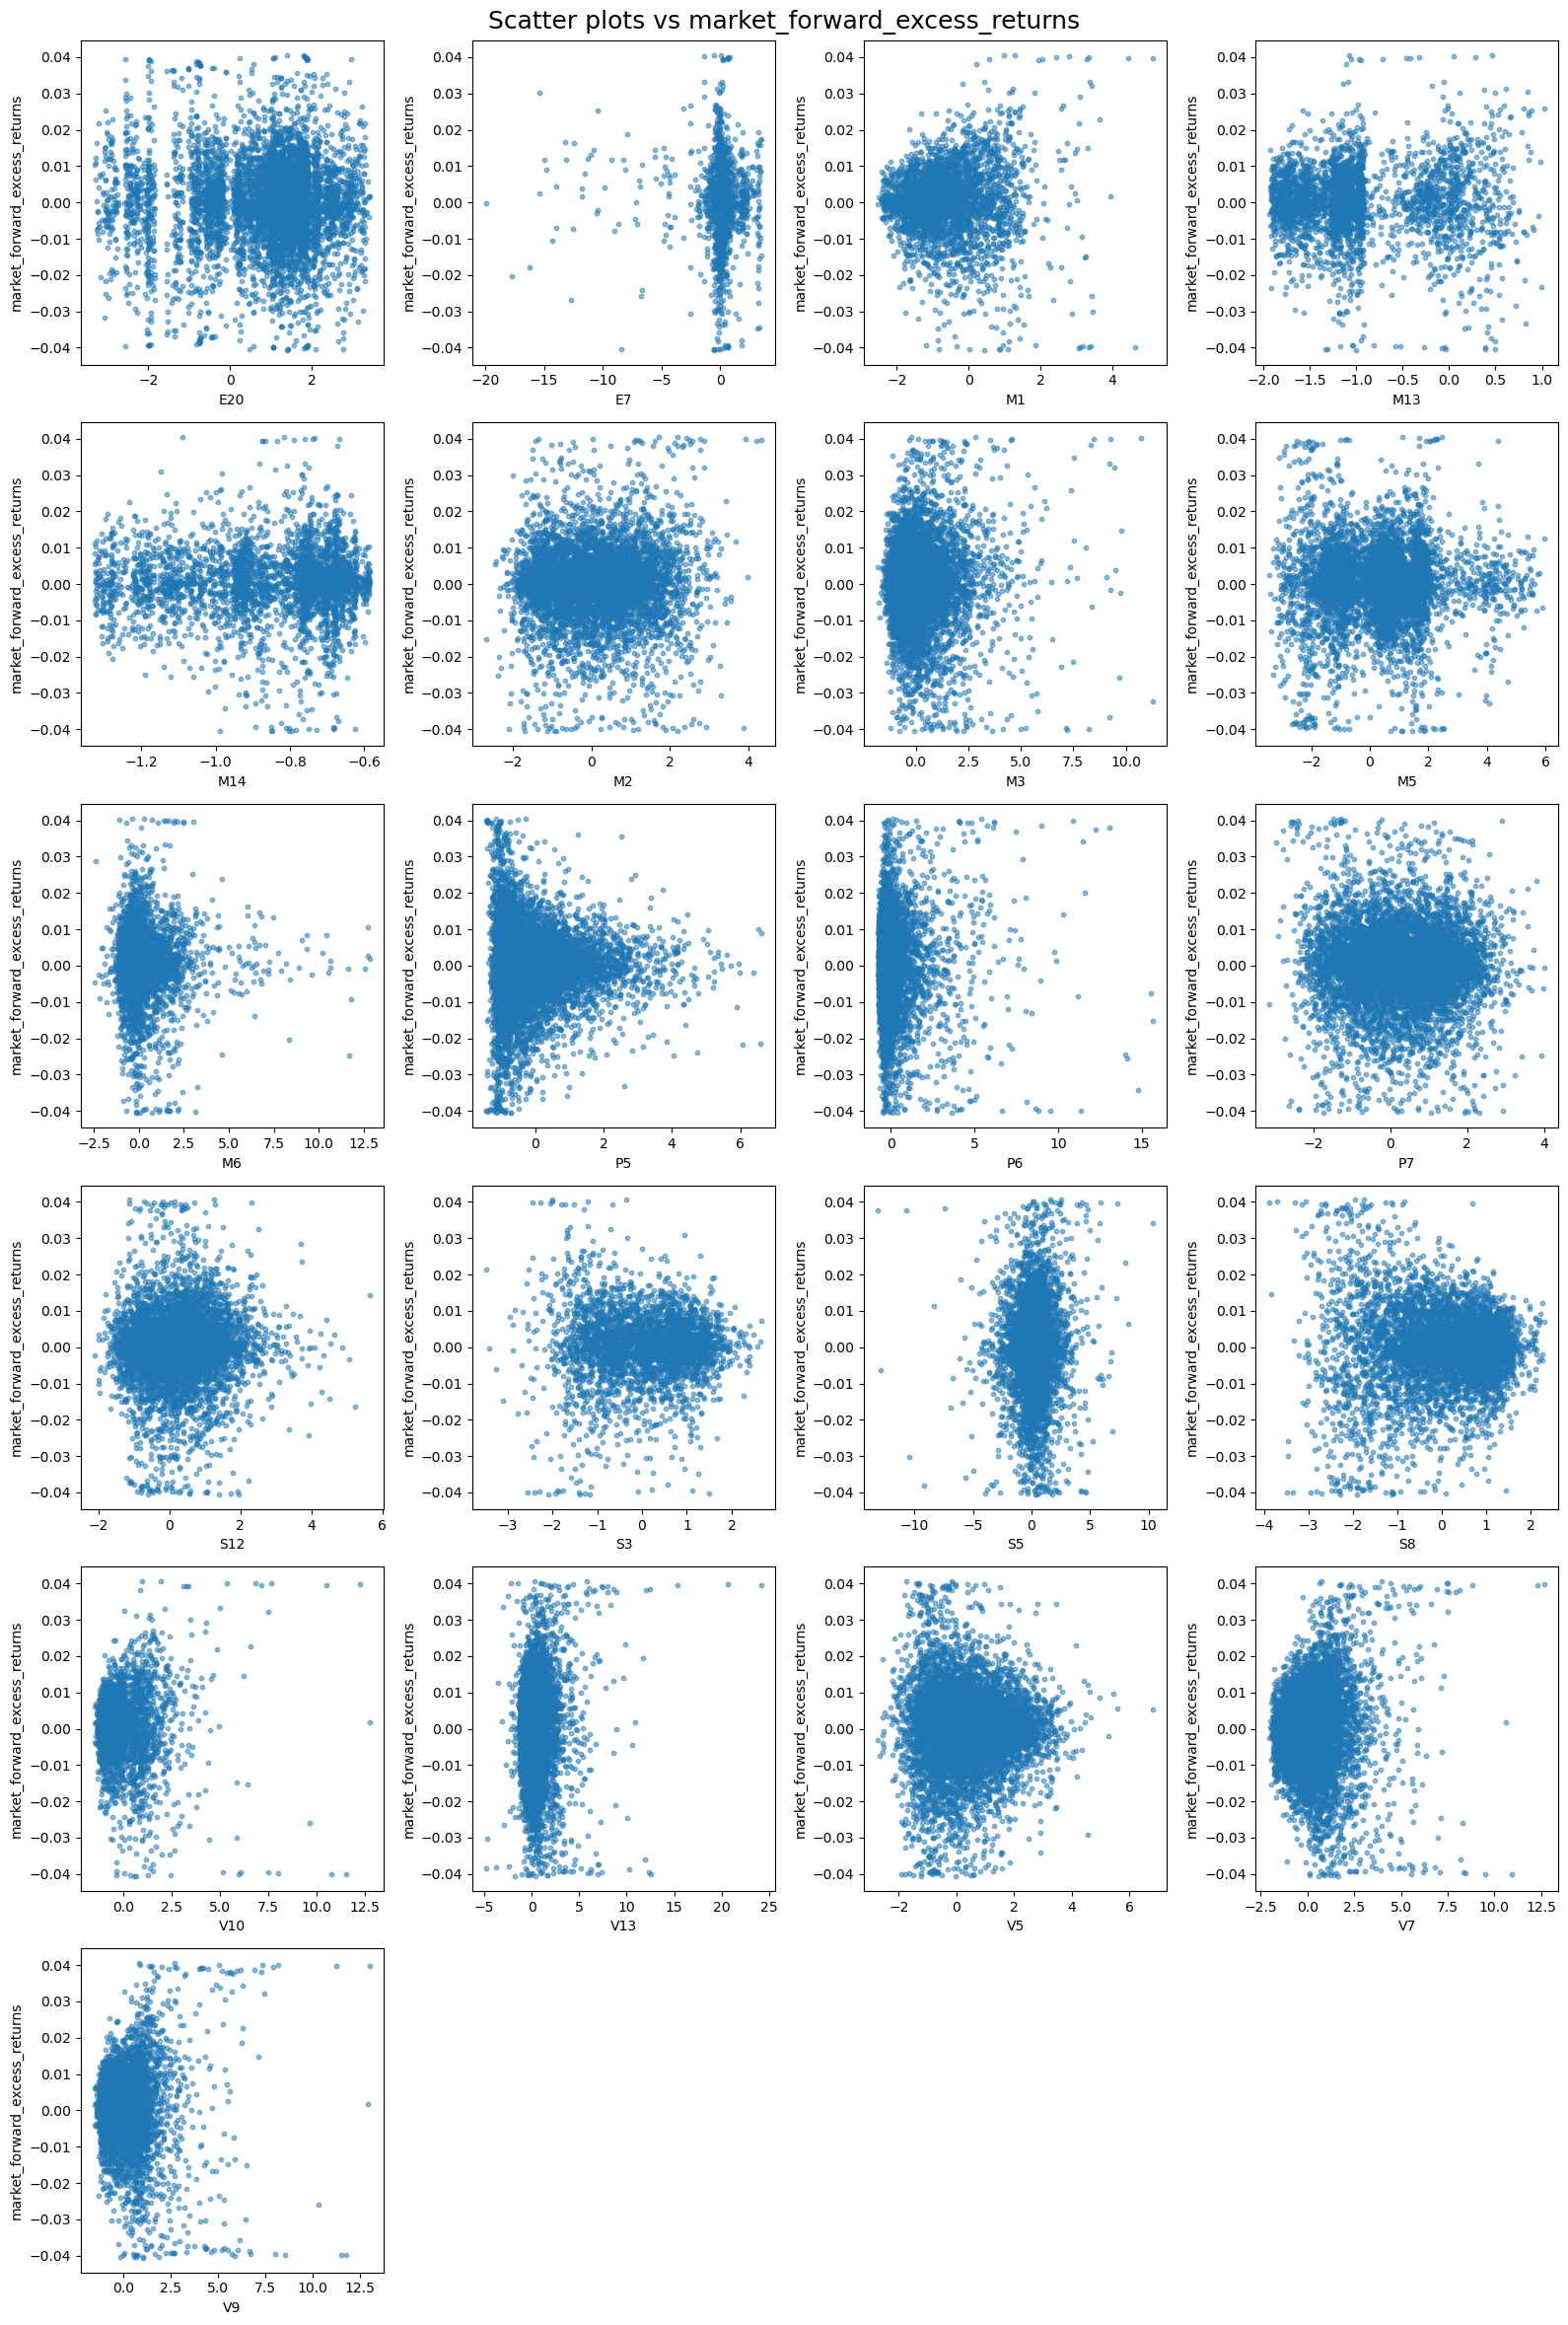

散点图已保存为 scatter_vs_forward_returns.png / scatter_vs_risk_free_rate.png / scatter_vs_market_forward_excess_returns.png


In [8]:
import matplotlib.pyplot as plt
import math

print("散点图将分析以下特征：", features_exist)

# 计算散点图网格布局
n = len(features_exist)
cols = 4
rows = math.ceil(n / cols)

for tgt in targets_exist:
    fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))
    fig.suptitle(f"Scatter plots vs {tgt}", fontsize=18)

    for idx, ft in enumerate(features_exist):
        r = idx // cols
        c = idx % cols
        ax = axes[r, c] if rows > 1 else axes[c]

        # 自动跳过缺失值（dropna）
        df_plot = df[[ft, tgt]].dropna()

        ax.scatter(df_plot[ft], df_plot[tgt], s=10, alpha=0.5)
        ax.set_xlabel(ft)
        ax.set_ylabel(tgt)

    # 隐藏空白子图
    for idx in range(len(features_exist), rows * cols):
        r = idx // cols
        c = idx % cols
        ax = axes[r, c] if rows > 1 else axes[c]
        ax.axis("off")

    plt.tight_layout(rect=[0, 0, 1, 0.99])
    plt.savefig(f"scatter_vs_{tgt}.png", dpi=200)
    plt.show()

print("散点图已保存为 scatter_vs_forward_returns.png / scatter_vs_risk_free_rate.png / scatter_vs_market_forward_excess_returns.png")

In [3]:
def compute_correlations(x: pd.Series, y: pd.Series):
    """返回 Pearson, Spearman, Kendall 三个相关系数。
    pandas 的 .corr 内部已经对缺失值做 pairwise 处理。"""
    pearson = x.corr(y, method="pearson")
    spearman = x.corr(y, method="spearman")
    kendall = x.corr(y, method="kendall")
    return pearson, spearman, kendall

rows = []

for ft in features_exist:
    for tgt in targets_exist:
        x = df[ft]
        y = df[tgt]
        pearson, spearman, kendall = compute_correlations(x, y)
        rows.append({
            "feature": ft,
            "target": tgt,
            "pearson": pearson,
            "spearman": spearman,
            "kendall": kendall,
        })

corr_df = pd.DataFrame(rows)

# 按 |pearson| 绝对值排序，更方便观察强相关特征
corr_df_sorted = corr_df.sort_values(by="pearson", key=lambda s: s.abs(), ascending=False)

corr_df_sorted.head(30)

feature                         target   pearson  spearman   kendall
13     M14                 risk_free_rate -0.575216 -0.478891 -0.342046
1      E20                 risk_free_rate  0.371165  0.463294  0.263979
25      M6                 risk_free_rate -0.225192 -0.120700 -0.099300
7       M1                 risk_free_rate -0.222325 -0.187880 -0.115787
22      M5                 risk_free_rate  0.216251  0.141014  0.075011
49     V10                 risk_free_rate -0.205099 -0.073062 -0.063246
37     S12                 risk_free_rate -0.199702 -0.231534 -0.155484
10     M13                 risk_free_rate -0.170111 -0.061571 -0.102132
61      V9                 risk_free_rate -0.160816 -0.004343 -0.012596
34      P7                 risk_free_rate  0.132085  0.127108  0.083972
19      M3                 risk_free_rate -0.122351 -0.080193 -0.057135
58      V7                 risk_free_rate  0.097839  0.134392  0.086613
55      V5                 risk_free_rate -0.083704 -0.131224 -0.090628
51     V13                forward_returns  0.063069  0.047158  0.031863
53     V13  market_forward_excess_returns  0.062395  0.046438  0.031442
31      P6                 risk_free_rate  0.056108  0.064358  0.036406
43      S5                 risk_free_rate  0.055901  0.055200  0.036726
4       E7                 risk_free_rate  0.054996 -0.251971 -0.137176
52     V13                 risk_free_rate  0.047874  0.065030  0.041562
8       M1  market_forward_excess_returns  0.046111  0.053104  0.037043
6       M1                forward_returns  0.044813  0.050816  0.035369
42      S5                forward_returns  0.040469  0.039580  0.027988
44      S5  market_forward_excess_returns  0.040010  0.039138  0.027726
15      M2                forward_returns  0.033337  0.029084  0.019579
17      M2  market_forward_excess_returns  0.033238  0.029129  0.019661
57      V7                forward_returns  0.032741  0.038136  0.025733
50     V10  market_forward_excess_returns  0.032635  0.043996  0.029346
5       E7  market_forward_excess_returns -0.032294 -0.014016 -0.008631
3       E7                forward_returns -0.032016 -0.016381 -0.010295
48     V10                forward_returns  0.031678  0.043065  0.028785

In [4]:
# 保存完整相关性结果
output_path = "feature_target_corr_full.csv"
corr_df_sorted.to_csv(output_path, index=False)
print("已保存到", output_path)

已保存到 feature_target_corr_full.csv
